# MLwP_final_第22組.ipynb

# [ 期末報告問題 ]

### import 所需套件

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### 匯入資料集，並切分feature和target

In [2]:
#讀取CSV檔案
data = pd.read_csv('wisc_bc_data.csv')

feature = data.loc[:,'radius_mean':'fractal_dimension_worst']
normal_feature = preprocessing.StandardScaler().fit_transform(feature)

#轉換屬性型態
#將屬性轉為數字label
le = preprocessing.LabelEncoder()
target = le.fit_transform(data['diagnosis'])

# 切分訓練與測試資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normal_feature, target, test_size = 0.2, random_state=1)

# 定義 target_name 用於顯示圖表使用
target_names = ['B', 'M']


### (1) Nearest Neighbors [kNN, k = sqrt(number of training data)]

訓練集準確度為： 0.9340659340659341
測試集準確度為： 0.9473684210526315
使用 Cross-Validation 準確度為： 0.9526741054251634
使用 Leave-One-Out cross-validation 準確度為 0.9560632688927944

classification_report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



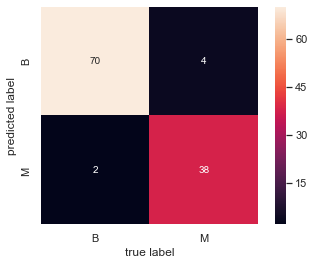

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# 建立 kNN 模型
k = round(len(X_train)**0.5)
knn = KNeighborsClassifier(n_neighbors= k)

datanew_knn = knn.fit(X_train, y_train)

# 進行 Ensemble learning
cv_scores = cross_val_score(estimator = knn, X = normal_feature, y = target, cv = 5)

# Leave-One-Out cross-validation
loocv = LeaveOneOut()
loocv_results = cross_val_score(knn, normal_feature, target, cv=loocv)

# 預測
y_test_pred = datanew_nb.predict(X_test)
y_train_pred = datanew_nb.predict(X_train)
# 績效
test_accuracy = accuracy_score(y_test ,y_test_pred)
train_accuracy = accuracy_score(y_train ,y_train_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('訓練集準確度為：', train_accuracy)
print('測試集準確度為：', test_accuracy)
print('使用 Cross-Validation 準確度為：', cv_scores.mean())
print('使用 Leave-One-Out cross-validation 準確度為', loocv_results.mean())
print('\nclassification_report:\n', classification_report(y_test, y_test_pred, target_names=target_names))

mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### (2) Naive Bayes [GaussianNB]

訓練集準確度為： 0.9340659340659341
測試集準確度為： 0.9473684210526315
使用 Cross-Validation 準確度為： 0.9280800307810695
使用 Leave-One-Out cross-validation 準確度為 0.9332161687170475

classification_report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



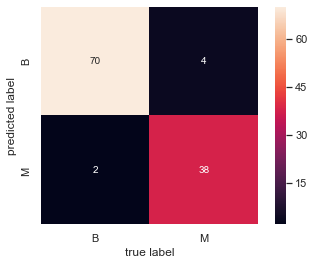

In [11]:
from sklearn.naive_bayes import GaussianNB

# 建立 Naive Bayes 模型
nb = GaussianNB()

datanew_nb = nb.fit(X_train, y_train)

# 進行 Ensemble learning
cv_scores = cross_val_score(estimator = nb, X = normal_feature, y = target, cv=5)

# Leave-One-Out cross-validation
loocv = LeaveOneOut()
loocv_results = cross_val_score(nb, normal_feature, target, cv = loocv)

# 預測
y_test_pred = datanew_nb.predict(X_test)
y_train_pred = datanew_nb.predict(X_train)
# 績效
test_accuracy = accuracy_score(y_test ,y_test_pred)
train_accuracy = accuracy_score(y_train ,y_train_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('訓練集準確度為：', train_accuracy)
print('測試集準確度為：', test_accuracy)
print('使用 Cross-Validation 準確度為：', cv_scores.mean())
print('使用 Leave-One-Out cross-validation 準確度為', loocv_results.mean())
print('\nclassification_report:\n', classification_report(y_test, y_test_pred, target_names=target_names))

mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### (3) SVM

訓練集準確度為： 0.9340659340659341
測試集準確度為： 0.9473684210526315
使用 Cross-Validation 準確度為： 0.9683878414774914
使用 Leave-One-Out cross-validation 準確度為 0.9789103690685413

classification_report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



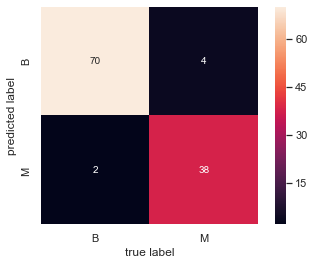

In [12]:
from sklearn.svm import SVC

# 建立 SVM 模型
svc = SVC(gamma = 0.01, C=1.0)

datanew_svc = svc.fit(X_train, y_train)

# 進行 Ensemble learning
cv_scores = cross_val_score(estimator = svc, X = normal_feature, y = target, cv=5)

# Leave-One-Out cross-validation
loocv = LeaveOneOut()
loocv_results = cross_val_score(svc, normal_feature, target, cv = loocv)

# 預測
y_test_pred = datanew_nb.predict(X_test)
y_train_pred = datanew_nb.predict(X_train)
# 績效
test_accuracy = accuracy_score(y_test ,y_test_pred)
train_accuracy = accuracy_score(y_train ,y_train_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('訓練集準確度為：', train_accuracy)
print('測試集準確度為：', test_accuracy)
print('使用 Cross-Validation 準確度為：', cv_scores.mean())
print('使用 Leave-One-Out cross-validation 準確度為', loocv_results.mean())
print('\nclassification_report:\n', classification_report(y_test, y_test_pred, target_names=target_names))

mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### (4) Logistic Regression

訓練集準確度為： 0.9340659340659341
測試集準確度為： 0.9473684210526315
使用 Cross-Validation 準確度為： 0.9789149672951135
使用 Leave-One-Out cross-validation 準確度為 0.9789103690685413

classification_report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



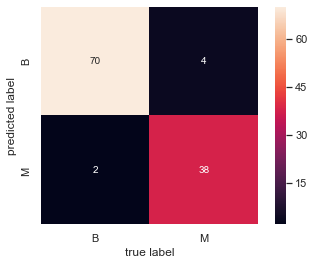

In [13]:
from sklearn.linear_model import LogisticRegression

# 建立 LinearRegression 模型
lr = LogisticRegression(solver='liblinear')

datanew_lr = lr.fit(X_train, y_train)

# 進行 Ensemble learning
cv_scores = cross_val_score(estimator = lr, X = normal_feature, y = target, cv=5)

# Leave-One-Out cross-validation
loocv = LeaveOneOut()
loocv_results = cross_val_score(lr, normal_feature, target, cv = loocv)

# 預測
y_test_pred = datanew_nb.predict(X_test)
y_train_pred = datanew_nb.predict(X_train)
# 績效
test_accuracy = accuracy_score(y_test ,y_test_pred)
train_accuracy = accuracy_score(y_train ,y_train_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('訓練集準確度為：', train_accuracy)
print('測試集準確度為：', test_accuracy)
print('使用 Cross-Validation 準確度為：', cv_scores.mean())
print('使用 Leave-One-Out cross-validation 準確度為', loocv_results.mean())
print('\nclassification_report:\n', classification_report(y_test, y_test_pred, target_names=target_names))

mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### (5) Random Forests 

訓練集準確度為： 0.9340659340659341
測試集準確度為： 0.9473684210526315
使用 Cross-Validation 準確度為： 0.9492574066948827
使用 Leave-One-Out cross-validation 準確度為 0.9525483304042179

classification_report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



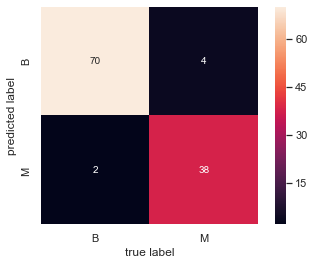

In [14]:
from sklearn.ensemble import RandomForestClassifier

# 建立 Random Forests 模型
rf = RandomForestClassifier(n_estimators=5)

datanew_rf = rf.fit(X_train, y_train)

# 進行 Ensemble learning
cv_scores = cross_val_score(estimator = rf, X = normal_feature, y = target, cv=5)

# Leave-One-Out cross-validation
loocv = LeaveOneOut()
loocv_results = cross_val_score(rf, normal_feature, target, cv = loocv)

# 預測
y_test_pred = datanew_nb.predict(X_test)
y_train_pred = datanew_nb.predict(X_train)
# 績效
test_accuracy = accuracy_score(y_test ,y_test_pred)
train_accuracy = accuracy_score(y_train ,y_train_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('訓練集準確度為：', train_accuracy)
print('測試集準確度為：', test_accuracy)
print('使用 Cross-Validation 準確度為：', cv_scores.mean())
print('使用 Leave-One-Out cross-validation 準確度為', loocv_results.mean())
print('\nclassification_report:\n', classification_report(y_test, y_test_pred, target_names=target_names))

mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### (6) Neural Networks [MLPClassifier]

C:\Users\BoCheng\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\BoCheng\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\BoCheng\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\BoCheng\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iter

訓練集準確度為： 0.9340659340659341
測試集準確度為： 0.9473684210526315
使用 Cross-Validation 準確度為： 0.9684186225471336
使用 Leave-One-Out cross-validation 準確度為 0.9666080843585237

classification_report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



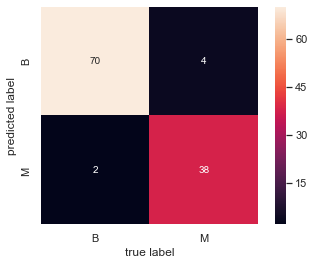

In [7]:
from sklearn.neural_network import MLPClassifier

# 建立 LinearRegression 模型
mlp = MLPClassifier(hidden_layer_sizes=[3],activation='relu',solver ='sgd',max_iter=1000)

datanew_mlp = mlp.fit(X_train, y_train)

# 進行 Ensemble learning
cv_scores = cross_val_score(estimator = mlp, X = normal_feature, y = target, cv=5)

# Leave-One-Out cross-validation
loocv = LeaveOneOut()
loocv_results = cross_val_score(mlp, normal_feature, target, cv = loocv)

# 預測
y_test_pred = datanew_nb.predict(X_test)
y_train_pred = datanew_nb.predict(X_train)
# 績效
test_accuracy = accuracy_score(y_test ,y_test_pred)
train_accuracy = accuracy_score(y_train ,y_train_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('訓練集準確度為：', train_accuracy)
print('測試集準確度為：', test_accuracy)
print('使用 Cross-Validation 準確度為：', cv_scores.mean())
print('使用 Leave-One-Out cross-validation 準確度為', loocv_results.mean())
print('\nclassification_report:\n', classification_report(y_test, y_test_pred, target_names=target_names))

mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# [ 加分題 ] : (Optional)

In [18]:
# 將特徵資料部份進行 z-score 標準化 (standardization)
standard_feature = (feature-feature.mean())/feature.std()

# 切分訓練與測試資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standard_feature, target, test_size = 0.2, random_state=1)

### (1) Nearest Neighbors [kNN, k = sqrt(number of training data)]

訓練集準確度為： 0.9340659340659341
測試集準確度為： 0.9473684210526315
使用 Cross-Validation 準確度為： 0.9526741054251634
使用 Leave-One-Out cross-validation 準確度為 0.9560632688927944

classification_report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



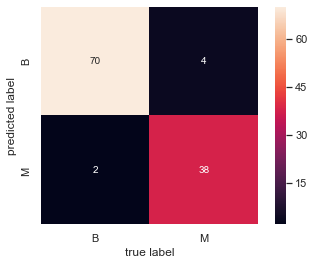

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# 建立 kNN 模型
k = round(len(X_train)**0.5)
knn = KNeighborsClassifier(n_neighbors= k)

datanew_knn = knn.fit(X_train, y_train)

# 進行 Ensemble learning
cv_scores = cross_val_score(estimator = knn, X = standard_feature, y = target, cv=5)

# Leave-One-Out cross-validation
loocv = LeaveOneOut()
loocv_results = cross_val_score(knn, standard_feature, target, cv = loocv)

# 預測
y_test_pred = datanew_nb.predict(X_test)
y_train_pred = datanew_nb.predict(X_train)
# 績效
test_accuracy = accuracy_score(y_test ,y_test_pred)
train_accuracy = accuracy_score(y_train ,y_train_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('訓練集準確度為：', train_accuracy)
print('測試集準確度為：', test_accuracy)
print('使用 Cross-Validation 準確度為：', cv_scores.mean())
print('使用 Leave-One-Out cross-validation 準確度為', loocv_results.mean())
print('\nclassification_report:\n', classification_report(y_test, y_test_pred, target_names=target_names))

mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### (2) Naive Bayes [GaussianNB]

訓練集準確度為： 0.9340659340659341
測試集準確度為： 0.9473684210526315
使用 Cross-Validation 準確度為： 0.9280800307810695
使用 Leave-One-Out cross-validation 準確度為 0.9332161687170475

classification_report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



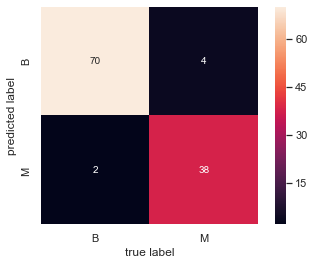

In [24]:
from sklearn.naive_bayes import GaussianNB

# 建立 Naive Bayes 模型
nb = GaussianNB()

datanew_nb = nb.fit(X_train, y_train)

# 進行 Ensemble learning
cv_scores = cross_val_score(estimator = nb, X = standard_feature, y = target, cv=5)

# Leave-One-Out cross-validation
loocv = LeaveOneOut()
loocv_results = cross_val_score(nb, standard_feature, target, cv = loocv)

# 預測
y_test_pred = datanew_nb.predict(X_test)
y_train_pred = datanew_nb.predict(X_train)
# 績效
test_accuracy = accuracy_score(y_test ,y_test_pred)
train_accuracy = accuracy_score(y_train ,y_train_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('訓練集準確度為：', train_accuracy)
print('測試集準確度為：', test_accuracy)
print('使用 Cross-Validation 準確度為：', cv_scores.mean())
print('使用 Leave-One-Out cross-validation 準確度為', loocv_results.mean())
print('\nclassification_report:\n', classification_report(y_test, y_test_pred, target_names=target_names))

mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### (3) SVM

訓練集準確度為： 0.9340659340659341
測試集準確度為： 0.9473684210526315
使用 Cross-Validation 準確度為： 0.9683878414774914
使用 Leave-One-Out cross-validation 準確度為 0.9789103690685413

classification_report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



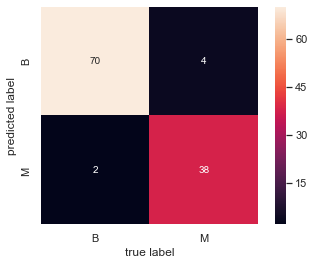

In [23]:
from sklearn.svm import SVC

# 建立 SVM 模型
svc = SVC(gamma = 0.01, C=1.0)

datanew_svc = svc.fit(X_train, y_train)

# 進行 Ensemble learning
cv_scores = cross_val_score(estimator = svc, X = standard_feature, y = target, cv=5)

# Leave-One-Out cross-validation
loocv = LeaveOneOut()
loocv_results = cross_val_score(svc, standard_feature, target, cv = loocv)

# 預測
y_test_pred = datanew_nb.predict(X_test)
y_train_pred = datanew_nb.predict(X_train)
# 績效
test_accuracy = accuracy_score(y_test ,y_test_pred)
train_accuracy = accuracy_score(y_train ,y_train_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('訓練集準確度為：', train_accuracy)
print('測試集準確度為：', test_accuracy)
print('使用 Cross-Validation 準確度為：', cv_scores.mean())
print('使用 Leave-One-Out cross-validation 準確度為', loocv_results.mean())
print('\nclassification_report:\n', classification_report(y_test, y_test_pred, target_names=target_names))

mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### (4) Logistic Regression

訓練集準確度為： 0.9340659340659341
測試集準確度為： 0.9473684210526315
使用 Cross-Validation 準確度為： 0.9789149672951135
使用 Leave-One-Out cross-validation 準確度為 0.9789103690685413

classification_report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



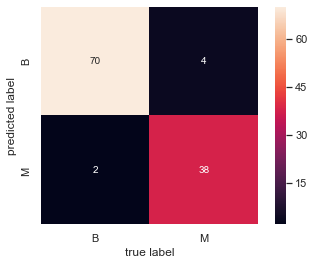

In [22]:
from sklearn.linear_model import LogisticRegression

# 建立 LinearRegression 模型
lr = LogisticRegression(solver='liblinear')

datanew_lr = lr.fit(X_train, y_train)

# 進行 Ensemble learning
cv_scores = cross_val_score(estimator = lr, X = standard_feature, y = target, cv=5)

# Leave-One-Out cross-validation
loocv = LeaveOneOut()
loocv_results = cross_val_score(lr, standard_feature, target, cv = loocv)

# 預測
y_test_pred = datanew_nb.predict(X_test)
y_train_pred = datanew_nb.predict(X_train)
# 績效
test_accuracy = accuracy_score(y_test ,y_test_pred)
train_accuracy = accuracy_score(y_train ,y_train_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('訓練集準確度為：', train_accuracy)
print('測試集準確度為：', test_accuracy)
print('使用 Cross-Validation 準確度為：', cv_scores.mean())
print('使用 Leave-One-Out cross-validation 準確度為', loocv_results.mean())
print('\nclassification_report:\n', classification_report(y_test, y_test_pred, target_names=target_names))

mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### (5) Random Forests 

訓練集準確度為： 0.9340659340659341
測試集準確度為： 0.9473684210526315
使用 Cross-Validation 準確度為： 0.9597229703732205
使用 Leave-One-Out cross-validation 準確度為 0.9543057996485061

classification_report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



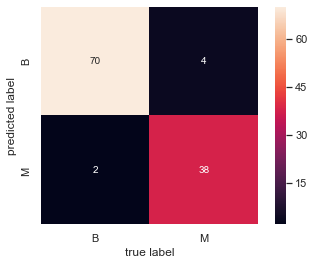

In [21]:
from sklearn.ensemble import RandomForestClassifier

# 建立 Random Forests 模型
rf = RandomForestClassifier(n_estimators=5)

datanew_rf = rf.fit(X_train, y_train)

# 進行 Ensemble learning
cv_scores = cross_val_score(estimator = rf, X = standard_feature, y = target, cv=5)

# Leave-One-Out cross-validation
loocv = LeaveOneOut()
loocv_results = cross_val_score(rf, standard_feature, target, cv = loocv)

# 預測
y_test_pred = datanew_nb.predict(X_test)
y_train_pred = datanew_nb.predict(X_train)
# 績效
test_accuracy = accuracy_score(y_test ,y_test_pred)
train_accuracy = accuracy_score(y_train ,y_train_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('訓練集準確度為：', train_accuracy)
print('測試集準確度為：', test_accuracy)
print('使用 Cross-Validation 準確度為：', cv_scores.mean())
print('使用 Leave-One-Out cross-validation 準確度為', loocv_results.mean())
print('\nclassification_report:\n', classification_report(y_test, y_test_pred, target_names=target_names))

mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### (6) Neural Networks [MLPClassifier]

C:\Users\BoCheng\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\BoCheng\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\BoCheng\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\BoCheng\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iter

訓練集準確度為： 0.9340659340659341
測試集準確度為： 0.9473684210526315
使用 Cross-Validation 準確度為： 0.970126971912274
使用 Leave-One-Out cross-validation 準確度為 0.9648506151142355

classification_report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



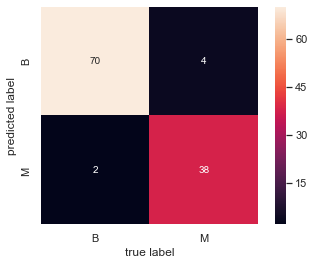

In [19]:
from sklearn.neural_network import MLPClassifier

# 建立 LinearRegression 模型
mlp = MLPClassifier(hidden_layer_sizes=[3],activation='relu',solver ='sgd',max_iter=1000)

datanew_mlp = mlp.fit(X_train, y_train)

# 進行 Ensemble learning
cv_scores = cross_val_score(estimator = mlp, X = standard_feature, y = target, cv=5)

# Leave-One-Out cross-validation
loocv = LeaveOneOut()
loocv_results = cross_val_score(mlp, standard_feature, target, cv = loocv)

# 預測
y_test_pred = datanew_nb.predict(X_test)
y_train_pred = datanew_nb.predict(X_train)
# 績效
test_accuracy = accuracy_score(y_test ,y_test_pred)
train_accuracy = accuracy_score(y_train ,y_train_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('訓練集準確度為：', train_accuracy)
print('測試集準確度為：', test_accuracy)
print('使用 Cross-Validation 準確度為：', cv_scores.mean())
print('使用 Leave-One-Out cross-validation 準確度為', loocv_results.mean())
print('\nclassification_report:\n', classification_report(y_test, y_test_pred, target_names=target_names))

mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');